<a href="https://colab.research.google.com/github/giorginolab/lottery-clumping/blob/master/work_in_progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# On the probability of clumping of lottery serial numbers

Toni Giorgino

See the accompanying R notebook for explanations. This is a Python implementation done for speed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# The np.random.sample without replacement is extremely slow. 
# I use randint instead, dropping cases where a number is extracted twice 
def mdistC(n=200, N=int(6e6), C=2):
  while True:
    w = np.sort(np.random.randint(1,N,n))
    if np.min(np.diff(w)) != 0:
      break
  wd = w-np.roll(w,C-1) # This and the next do the lag-C-1 first differences
  wd = wd[(C-1):]
  m = np.min(wd)
  return m

## Warmup problem: pairs of close numbers

In [7]:
R=1000
md = np.zeros([R],dtype=int)
for i in range(R): 
  md[i] = mdistC()

In [8]:
u=np.bincount(md) / R
cu = np.cumsum(u)

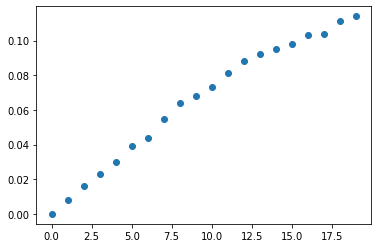

In [9]:
plt.plot(cu[0:20],'o')

## Solution: clumps of 3

Note: takes a long time (~20 min) to run.

In [10]:
R=10000000
md3 = np.zeros([R],dtype=int)
for i in range(R): 
  md3[i] = mdistC(C=3)

KeyboardInterrupt: 

In [14]:
# Parallel version - not much faster really
# https://joblib.readthedocs.io/en/latest/parallel.html

#from joblib import Parallel, delayed
#md3p = Parallel(n_jobs=4)(delayed(mdistC)(C=3) for i in range(R))
#md3=md3p

In [16]:
md3s = np.sort(md3)
D = np.arange(R)/R

### Cumulative distribution plot, whole range

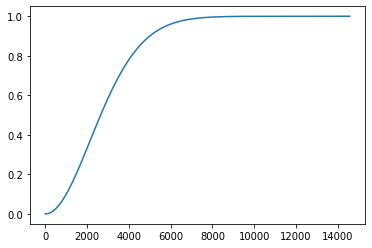

In [17]:
plt.plot(md3s,D)

### Cumulative distribution plot, zoomed around the "tight clumps" region

Text(0, 0.5, 'Cumulative probability (x 10^6)')

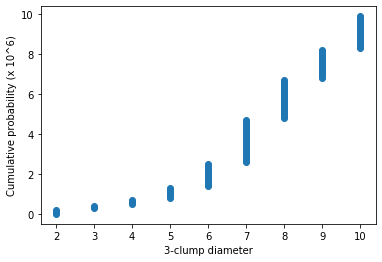

In [18]:
plt.plot(md3s[:100],D[:100] * 1e6,'o')
plt.xlabel("3-clump diameter")
plt.ylabel("Cumulative probability (x 10^6)")